# Signal Processing Lab №9
Noise Analysis

## Data Loading

In [1]:
import os

import numpy as np
import pandas as pd

import librosa
import librosa.display

import scipy.signal as sig
from scipy.io import wavfile

from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib

In [2]:
audio = wavfile.read('input/не_открывать.wav')

In [3]:
audio

(48000,
 array([[  0,   0],
        [  0,   0],
        [  0,   0],
        ...,
        [ 61, 352],
        [107, 301],
        [141, 201]], dtype=int16))

In [4]:
audio_mono = [audio[0], audio[1].mean(axis=1).astype(np.int16)]

In [5]:
wavfile.write('input/audio_mono.wav', rate=audio_mono[0], data=audio_mono[1])

In [6]:
window_size=0.025
hop_size=0.01

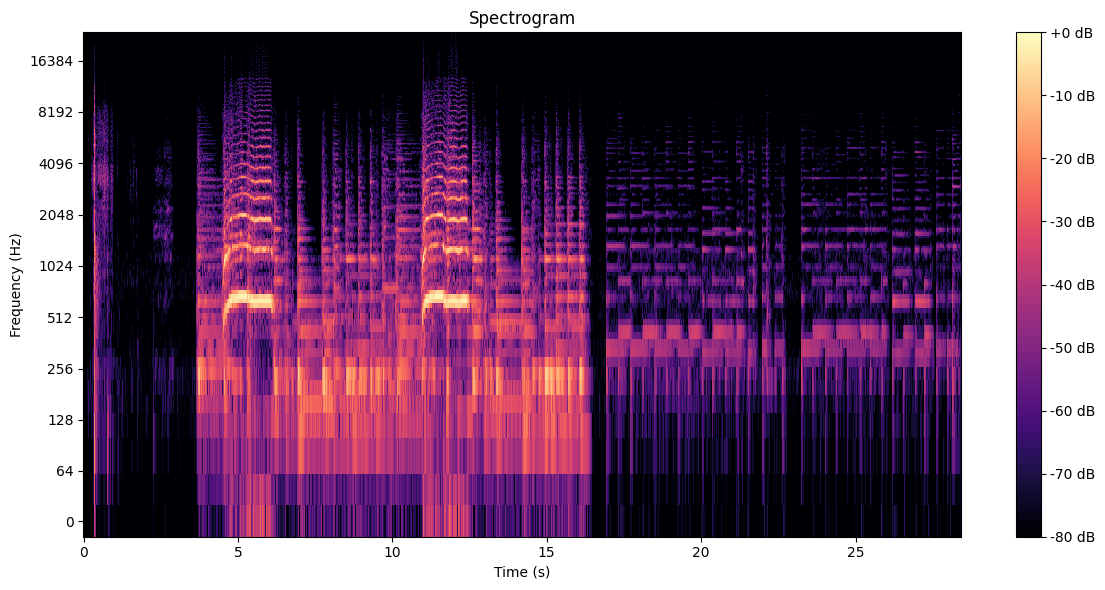

In [7]:
sr = audio_mono[0]
audio = audio_mono[1].astype(np.float16)

spectrogram = np.abs(librosa.stft(audio, hop_length=int(sr*hop_size), n_fft=int(sr*window_size)))

with np.errstate(divide='ignore'):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, hop_length=int(sr*hop_size), x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

In [10]:
filtered_audio = sig.savgol_filter(audio_mono[1], window_length=101, polyorder=5)

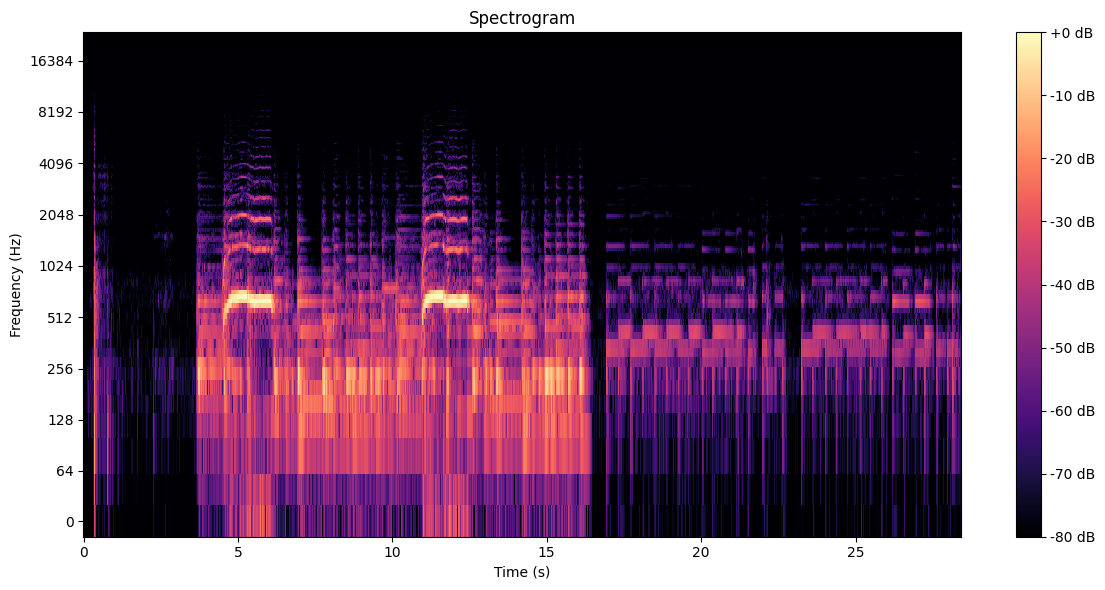

In [11]:
sr = audio_mono[0]
audio = filtered_audio.astype(np.float16)

spectrogram = np.abs(librosa.stft(audio, hop_length=int(sr*hop_size), n_fft=int(sr*window_size)))

with np.errstate(divide='ignore'):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, hop_length=int(sr*hop_size), x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

In [12]:
wavfile.write('output/audio_filtered.wav', rate=audio_mono[0], data=filtered_audio.astype(np.int16))